In [109]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [110]:
ecg_feature = pd.read_csv('./ecg_features.csv')
ppg_feature = pd.read_csv('./ppg_features.csv')
eda_feature = pd.read_csv('./eda_features.csv')
eeg_feature = pd.read_csv('./eeg_train_features.csv')
feel_feature = pd.read_csv('./feeling_labels.csv')
id_feature = pd.read_csv('./id_labels.csv')

In [111]:
id_feature

Unnamed: 0         1         2         3         4         5         6  \
0             0  0.007489 -0.002914  0.012315  0.016057  0.007052  0.000804   
1             1  0.007489 -0.002914  0.012315  0.016057  0.007052  0.000804   
2             2  0.007489 -0.002914  0.012315  0.016057  0.007052  0.000804   
3             3  0.007489 -0.002914  0.012315  0.016057  0.007052  0.000804   
4             4  0.007489 -0.002914  0.012315  0.016057  0.007052  0.000804   
..          ...       ...       ...       ...       ...       ...       ...   
229         229  0.003141 -0.006964  0.010231  0.005548  0.012103  0.000373   
230         230  0.003141 -0.006964  0.010231  0.005548  0.012103  0.000373   
231         231  0.003141 -0.006964  0.010231  0.005548  0.012103  0.000373   
232         232  0.003141 -0.006964  0.010231  0.005548  0.012103  0.000373   
233         233  0.003141 -0.006964  0.010231  0.005548  0.012103  0.000373   

           7         8         9        10        11        12        13  \
0    0.01158  0.003371  0.005506 -0.006168 -0.007888 -0.009054  0.008220   
1    0.01158  0.003371  0.005506 -0.006168 -0.007888 -0.009054  0.008220   
2    0.01158  0.003371  0.005506 -0.006168 -0.007888 -0.009054  0.008220   
3    0.01158  0.003371  0.005506 -0.006168 -0.007888 -0.009054  0.008220   
4    0.01158  0.003371  0.005506 -0.006168 -0.007888 -0.009054  0.008220   
..       ...       ...       ...       ...       ...       ...       ...   
229  0.00070 -0.001923 -0.003356 -0.005007 -0.003531 -0.002360  0.002836   
230  0.00070 -0.001923 -0.003356 -0.005007 -0.003531 -0.002360  0.002836   
231  0.00070 -0.001923 -0.003356 -0.005007 -0.003531 -0.002360  0.002836   
232  0.00070 -0.001923 -0.003356 -0.005007 -0.003531 -0.002360  0.002836   
233  0.00070 -0.001923 -0.003356 -0.005007 -0.003531 -0.002360  0.002836   

           14        15        16        17        18        19  
0   -0.000470  0.002197 -0.008175  0.013287 -0.002640 -0.010925  
1   -0.000470  0.002197 -0.008175  0.013287 -0.002640 -0.010925  
2   -0.000470  0.002197 -0.008175  0.013287 -0.002640 -0.010925  
3   -0.000470  0.002197 -0.008175  0.013287 -0.002640 -0.010925  
4   -0.000470  0.002197 -0.008175  0.013287 -0.002640 -0.010925  
..        ...       ...       ...       ...       ...       ...  
229 -0.001696 -0.006686 -0.007511  0.015053  0.009562 -0.020179  
230 -0.001696 -0.006686 -0.007511  0.015053  0.009562 -0.020179  
231 -0.001696 -0.006686 -0.007511  0.015053  0.009562 -0.020179  
232 -0.001696 -0.006686 -0.007511  0.015053  0.009562 -0.020179  
233 -0.001696 -0.006686 -0.007511  0.015053  0.009562 -0.020179  

[234 rows x 20 columns]

In [112]:
ecg_feature = ecg_feature.drop(['Unnamed: 0'], axis = 1)
ppg_feature = ppg_feature.drop(['Unnamed: 0'], axis = 1)

In [113]:
X_train = pd.concat([ecg_feature, ppg_feature, eda_feature, eeg_feature], axis = 1).values

In [114]:
label_data = pd.read_csv('./train_label_softmax.csv')
y_train = label_data.values

In [115]:
X_train

array([[12.140015 , 19.875168 ,  0.       , ...,  0.       ,  0.       ,
         9.369478 ],
       [13.15213  , 21.535746 ,  0.       , ...,  0.       ,  0.       ,
        10.511625 ],
       [13.004108 , 21.283129 ,  0.       , ...,  0.       ,  0.       ,
        10.715914 ],
       ...,
       [11.715818 , 19.185234 ,  0.       , ...,  0.       ,  0.       ,
        11.660636 ],
       [12.60052  , 20.63363  ,  0.       , ...,  0.       ,  3.590412 ,
        10.831481 ],
       [10.416733 , 17.057709 ,  0.       , ...,  0.       ,  0.       ,
         4.5714107]])

In [116]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(Flatten())

batch_size = 1
num_samples = 246
features = []

for i in range(0, num_samples, batch_size):
    batch = X_train[i:i+batch_size]
    extracted_features = model.predict(batch)
    features.append(extracted_features)

1/1 [==============================] - 0s 16ms/step


ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [117]:
feat_df = pd.DataFrame(np.array(features).reshape(234, 64))
feat_df

0         1    2         3    4    5    6         7         8    9   \
0    0.0  0.385429  0.0  0.110918  0.0  0.0  0.0  0.346737  0.009313  0.0   
1    0.0  0.359748  0.0  0.144659  0.0  0.0  0.0  0.336424  0.067304  0.0   
2    0.0  0.413075  0.0  0.111948  0.0  0.0  0.0  0.371862  0.011562  0.0   
3    0.0  0.283354  0.0  0.100868  0.0  0.0  0.0  0.253786  0.041618  0.0   
4    0.0  0.459208  0.0  0.138619  0.0  0.0  0.0  0.415962  0.204951  0.0   
..   ...       ...  ...       ...  ...  ...  ...       ...       ...  ...   
229  0.0  0.383774  0.0  0.206568  0.0  0.0  0.0  0.544016  0.172140  0.0   
230  0.0  0.515821  0.0  0.176690  0.0  0.0  0.0  0.508329  0.155187  0.0   
231  0.0  0.447826  0.0  0.164159  0.0  0.0  0.0  0.487110  0.131748  0.0   
232  0.0  0.499384  0.0  0.157571  0.0  0.0  0.0  0.422655  0.041555  0.0   
233  0.0  0.475528  0.0  0.155590  0.0  0.0  0.0  0.437986  0.000000  0.0   

     ...        54   55   56   57   58        59   60   61   62   63  
0    ...  0.463990  0.0  0.0  0.0  0.0  0.776942  0.0  0.0  0.0  0.0  
1    ...  0.441013  0.0  0.0  0.0  0.0  0.772983  0.0  0.0  0.0  0.0  
2    ...  0.513269  0.0  0.0  0.0  0.0  0.829295  0.0  0.0  0.0  0.0  
3    ...  0.384433  0.0  0.0  0.0  0.0  0.593873  0.0  0.0  0.0  0.0  
4    ...  0.552558  0.0  0.0  0.0  0.0  1.005568  0.0  0.0  0.0  0.0  
..   ...       ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  
229  ...  0.537696  0.0  0.0  0.0  0.0  1.027866  0.0  0.0  0.0  0.0  
230  ...  0.536341  0.0  0.0  0.0  0.0  1.100583  0.0  0.0  0.0  0.0  
231  ...  0.612962  0.0  0.0  0.0  0.0  1.101791  0.0  0.0  0.0  0.0  
232  ...  0.591618  0.0  0.0  0.0  0.0  1.067589  0.0  0.0  0.0  0.0  
233  ...  0.480287  0.0  0.0  0.0  0.0  0.914790  0.0  0.0  0.0  0.0  

[234 rows x 64 columns]

In [118]:
X_train = pd.concat([feat_df, feel_feature, id_feature], axis = 1).values

In [120]:
from keras import metrics

fin_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

fin_model.compile(optimizer='adam',
              loss=custom_cross_entropy_loss, metrics=[tf.keras.metrics.RootMeanSquaredError()])
#model.add(Flatten())
hist = fin_model.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
8/8 [==============================] - 1s 4ms/step - loss: 0.3181 - root_mean_squared_error: 0.3164
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.3052 - root_mean_squared_error: 0.3072
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.3041 - root_mean_squared_error: 0.3070
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.3038 - root_mean_squared_error: 0.3075
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.3007 - root_mean_squared_error: 0.3055
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.3078 - root_mean_squared_error: 0.3088
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.3031 - root_mean_squared_error: 0.3060
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2981 - root_mean_squared_error: 0.3045
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2997 - root_mean_squar

8/8 [==============================] - 0s 4ms/step - loss: 0.2876 - root_mean_squared_error: 0.2985
Epoch 144/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2862 - root_mean_squared_error: 0.2977
Epoch 145/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2852 - root_mean_squared_error: 0.2970
Epoch 146/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2859 - root_mean_squared_error: 0.2976
Epoch 147/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2854 - root_mean_squared_error: 0.2970
Epoch 148/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2848 - root_mean_squared_error: 0.2965
Epoch 149/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2838 - root_mean_squared_error: 0.2962
Epoch 150/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2827 - root_mean_squared_error: 0.2958
Epoch 151/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2828 - root_mean_sq

8/8 [==============================] - 0s 4ms/step - loss: 0.1644 - root_mean_squared_error: 0.1768
Epoch 286/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1657 - root_mean_squared_error: 0.1789
Epoch 287/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1667 - root_mean_squared_error: 0.1782
Epoch 288/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1663 - root_mean_squared_error: 0.1804
Epoch 289/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1657 - root_mean_squared_error: 0.1782
Epoch 290/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1648 - root_mean_squared_error: 0.1783
Epoch 291/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1643 - root_mean_squared_error: 0.1769
Epoch 292/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1659 - root_mean_squared_error: 0.1787
Epoch 293/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1632 - root_mean_sq

8/8 [==============================] - 0s 4ms/step - loss: 0.1504 - root_mean_squared_error: 0.1605
Epoch 428/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1509 - root_mean_squared_error: 0.1620
Epoch 429/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1522 - root_mean_squared_error: 0.1625
Epoch 430/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1512 - root_mean_squared_error: 0.1616
Epoch 431/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1507 - root_mean_squared_error: 0.1612
Epoch 432/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1586 - root_mean_squared_error: 0.1741
Epoch 433/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1573 - root_mean_squared_error: 0.1688
Epoch 434/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1550 - root_mean_squared_error: 0.1671
Epoch 435/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1529 - root_mean_sq

8/8 [==============================] - 0s 3ms/step - loss: 0.1438 - root_mean_squared_error: 0.1503
Epoch 570/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1440 - root_mean_squared_error: 0.1505
Epoch 571/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1445 - root_mean_squared_error: 0.1514
Epoch 572/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1445 - root_mean_squared_error: 0.1511
Epoch 573/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1452 - root_mean_squared_error: 0.1528
Epoch 574/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1440 - root_mean_squared_error: 0.1508
Epoch 575/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1433 - root_mean_squared_error: 0.1496
Epoch 576/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1438 - root_mean_squared_error: 0.1496
Epoch 577/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1464 - root_mean_sq

8/8 [==============================] - 0s 4ms/step - loss: 0.1379 - root_mean_squared_error: 0.1396
Epoch 712/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1338 - root_mean_squared_error: 0.1296
Epoch 713/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1342 - root_mean_squared_error: 0.1308
Epoch 714/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1332 - root_mean_squared_error: 0.1285
Epoch 715/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1340 - root_mean_squared_error: 0.1298
Epoch 716/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1341 - root_mean_squared_error: 0.1302
Epoch 717/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1351 - root_mean_squared_error: 0.1323
Epoch 718/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1342 - root_mean_squared_error: 0.1309
Epoch 719/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1339 - root_mean_sq

8/8 [==============================] - 0s 3ms/step - loss: 0.1302 - root_mean_squared_error: 0.1203
Epoch 854/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1279 - root_mean_squared_error: 0.1160
Epoch 855/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1279 - root_mean_squared_error: 0.1157
Epoch 856/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1273 - root_mean_squared_error: 0.1148
Epoch 857/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1264 - root_mean_squared_error: 0.1135
Epoch 858/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1278 - root_mean_squared_error: 0.1151
Epoch 859/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1264 - root_mean_squared_error: 0.1125
Epoch 860/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1302 - root_mean_squared_error: 0.1223
Epoch 861/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1276 - root_mean_sq

8/8 [==============================] - 0s 4ms/step - loss: 0.1203 - root_mean_squared_error: 0.0978
Epoch 996/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1209 - root_mean_squared_error: 0.0973
Epoch 997/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1207 - root_mean_squared_error: 0.0984
Epoch 998/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1219 - root_mean_squared_error: 0.1014
Epoch 999/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1217 - root_mean_squared_error: 0.0993
Epoch 1000/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1206 - root_mean_squared_error: 0.0980


In [121]:
min(hist.history['root_mean_squared_error'])

0.09727562963962555

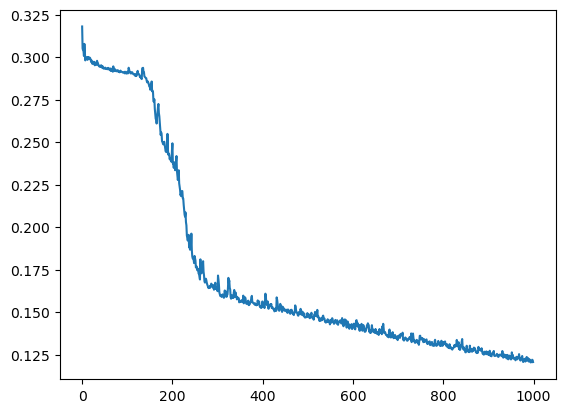

In [148]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.show()

In [122]:
import tensorflow as tf

def custom_cross_entropy_loss(y_true, y_pred):
    # Clip predicted values to avoid numerical instability
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())

    # Compute cross entropy loss
    loss = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
    loss /= tf.cast(tf.shape(y_true)[-1], dtype=loss.dtype)  # Divide by number of classes

    return loss

# Dense layer의 output level에서의 activation function: softmax
# 모델 컴파일 시 사용예시: model.compile(optimizer='adam', loss=custom_cross_entropy_loss, metrics=['accuracy'])


# Test

In [123]:
ecg_test_feature = pd.read_csv('./ecg_test_features.csv')
ppg_test_feature = pd.read_csv('./ppg_test_features.csv')
eda_test_feature = pd.read_csv('./eda_test_features.csv')
eeg_test_feature = pd.read_csv('./eda_test_features.csv')
feel_test_feature = pd.read_csv('./feeling_test_labels.csv')
id_test_feature = pd.read_csv('./id_test_labels.csv')

In [124]:
ecg_test_feature = ecg_test_feature.drop(['Unnamed: 0'], axis = 1)
ppg_test_feature = ppg_test_feature.drop(['Unnamed: 0'], axis = 1)

In [125]:
X_test = pd.concat([ecg_test_feature, ppg_test_feature, eda_test_feature, eeg_test_feature], axis = 1).values

In [126]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(Flatten())

batch_size = 1
num_samples = 108
features = []

for i in range(0, num_samples, batch_size):
    batch = X_train[i:i+batch_size]
    extracted_features = model.predict(batch)
    features.append(extracted_features)

1/1 [==============================] - 0s 16ms/step


In [127]:
test_feat_df = pd.DataFrame(np.array(features).reshape(108, 64))
test_feat_df

0         1    2    3         4         5    6         7   \
0    0.030167  0.065783  0.0  0.0  0.049834  0.032167  0.0  0.009599   
1    0.033181  0.070831  0.0  0.0  0.054493  0.034059  0.0  0.009737   
2    0.041102  0.087702  0.0  0.0  0.070544  0.043144  0.0  0.010221   
3    0.035746  0.075267  0.0  0.0  0.065430  0.037985  0.0  0.005569   
4    0.050513  0.108775  0.0  0.0  0.094555  0.054087  0.0  0.007947   
..        ...       ...  ...  ...       ...       ...  ...       ...   
103  0.501594  0.949805  0.0  0.0  1.078921  0.601356  0.0  0.000000   
104  0.510240  0.969209  0.0  0.0  1.097166  0.611553  0.0  0.000000   
105  0.500978  0.943436  0.0  0.0  1.082768  0.603202  0.0  0.000000   
106  0.504983  0.950361  0.0  0.0  1.092021  0.608036  0.0  0.000000   
107  0.514821  0.974062  0.0  0.0  1.111693  0.619750  0.0  0.000000   

           8    9   ...   54        55        56   57        58   59  \
0    0.018691  0.0  ...  0.0  0.079379  0.019731  0.0  0.059032  0.0   
1    0.021282  0.0  ...  0.0  0.088673  0.022853  0.0  0.063163  0.0   
2    0.029802  0.0  ...  0.0  0.114498  0.031245  0.0  0.078090  0.0   
3    0.029723  0.0  ...  0.0  0.107072  0.032199  0.0  0.069268  0.0   
4    0.042911  0.0  ...  0.0  0.150455  0.044056  0.0  0.100222  0.0   
..        ...  ...  ...  ...       ...       ...  ...       ...  ...   
103  0.564168  0.0  ...  0.0  1.733245  0.712493  0.0  0.976515  0.0   
104  0.573857  0.0  ...  0.0  1.759989  0.721287  0.0  0.994839  0.0   
105  0.566818  0.0  ...  0.0  1.738343  0.720535  0.0  0.975359  0.0   
106  0.572020  0.0  ...  0.0  1.752825  0.726579  0.0  0.983232  0.0   
107  0.582194  0.0  ...  0.0  1.783635  0.736884  0.0  1.003170  0.0   

           60        61   62        63  
0    0.047963  0.010010  0.0  0.048505  
1    0.051631  0.009617  0.0  0.051734  
2    0.066724  0.012854  0.0  0.066694  
3    0.061230  0.014120  0.0  0.058570  
4    0.088530  0.018858  0.0  0.084598  
..        ...       ...  ...       ...  
103  1.067295  0.344806  0.0  0.913859  
104  1.083889  0.348599  0.0  0.929842  
105  1.072874  0.349318  0.0  0.917650  
106  1.081772  0.352509  0.0  0.924162  
107  1.101660  0.356738  0.0  0.942928  

[108 rows x 64 columns]

In [128]:
y_train = pd.concat([test_feat_df, feel_test_feature, id_test_feature], axis = 1).values

In [129]:
test_feel = fin_model.predict(y_train)

4/4 [==============================] - 0s 1ms/step


In [131]:
test_feel

array([[9.71281528e-01, 1.02082482e-02, 2.76479725e-04, 1.69950482e-02,
        3.70402151e-04, 8.68273783e-04],
       [9.95997548e-01, 1.80585484e-03, 6.41411825e-05, 1.19703065e-03,
        1.41406636e-04, 7.94111344e-04],
       [9.89981115e-01, 4.35906881e-03, 1.38872580e-04, 4.06797044e-03,
        2.50072218e-04, 1.20276958e-03],
       [9.72904801e-01, 7.13502616e-03, 1.84398232e-04, 1.87895522e-02,
        3.51276656e-04, 6.34888362e-04],
       [9.59339201e-01, 1.05321407e-02, 4.58995783e-04, 2.78891157e-02,
        5.36468986e-04, 1.24401809e-03],
       [9.52627778e-01, 1.17724333e-02, 6.17139973e-04, 3.17440704e-02,
        6.82420214e-04, 2.55617918e-03],
       [9.59919274e-01, 8.93526338e-03, 3.00384825e-04, 2.89755110e-02,
        4.77128720e-04, 1.39249337e-03],
       [9.47392166e-01, 1.31283980e-02, 8.26597272e-04, 3.27664986e-02,
        8.30815174e-04, 5.05553884e-03],
       [8.34845781e-01, 1.75399017e-02, 1.13450957e-03, 1.34337962e-01,
        2.47801095e-03, 

In [158]:
print(np.round(test_feel[0], 4) * 100)
print(np.round(test_feel[1], 4) * 100)
print(np.round(test_feel[2], 4) * 100)
print(np.round(test_feel[3], 4) * 100)
print(np.round(test_feel[4], 4) * 100)

[9.7129997e+01 1.0200000e+00 3.0000001e-02 1.7000000e+00 3.9999999e-02
 8.9999996e-02]
[9.95999985e+01 1.79999992e-01 9.99999978e-03 1.20000005e-01
 9.99999978e-03 7.99999982e-02]
[9.90000000e+01 4.39999998e-01 9.99999978e-03 4.09999996e-01
 3.00000012e-02 1.20000005e-01]
[9.7290001e+01 7.0999998e-01 2.0000000e-02 1.8800000e+00 3.9999999e-02
 6.0000002e-02]
[9.59300003e+01 1.04999995e+00 5.00000007e-02 2.78999996e+00
 5.00000007e-02 1.20000005e-01]
